In [1]:
from pymongo import MongoClient
import pprint
import pandas as pd
import matplotlib.pyplot as plt

db=MongoClient()["comic"]

# 요일별 웹툰 좋아요평균

In [2]:
webtoons=db["webtoons"]

pipeline=[
    {
        '$unwind': {
            'path': '$dayrank'
        }
    }, {
        '$group': {
            '_id': '$dayrank.day', 
            'totalLike': {
                '$sum': '$likeIt'
            }, 
            'totalWebtoons': {
                '$sum': 1
            }
        }
    }, {
        '$set': {
            'weekday': '$_id', 
            'avgLike': {
                '$divide': [
                    '$totalLike', '$totalWebtoons'
                ]
            }
        }
    }, {
        '$project': {
            'weekday': 1, 
            'avgLike': 1, 
            '_id': 0
        }
    }
]

In [3]:
plist = list(webtoons.aggregate(pipeline))

In [4]:
df=pd.DataFrame(plist)
df

,weekday,avgLike
0,sat,155627.562500
1,thu,173260.255319
2,wed,169281.549020
3,fri,180965.958333
4,sun,111100.857143
5,tue,185206.500000
6,mon,176405.450980


In [5]:
df=df.reindex([5,0,6,4,2,3,1])
df

,weekday,avgLike
5,tue,185206.500000
0,sat,155627.562500
6,mon,176405.450980
4,sun,111100.857143
2,wed,169281.549020
3,fri,180965.958333
1,thu,173260.255319


<BarContainer object of 7 artists>

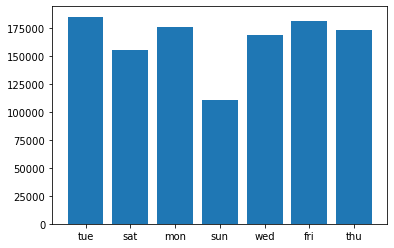

In [6]:
fig, ax = plt.subplots()

ax.bar(list(df.weekday), list(df.avgLike))

# 웹툰 전체 순위 

## 웹툰 좋아요, 웹툰 제목

In [7]:
pipeline=[
    {
        '$sort': {
            'likeIt': -1
        }
    }, {
        '$project': {
            '_id': 0, 
            'title': 1, 
            'likeIt': 1
        }
    }, {
        '$limit': 10
    }
]

In [8]:
plist=list(webtoons.aggregate(pipeline))

In [9]:
df=pd.DataFrame(plist)

df=df[::-1]
df.tail()

,title,likeIt
4,마음의소리,1307140
3,신의 탑,1341927
2,프리드로우,1477292
1,외모지상주의,1996585
0,연애혁명,2237081


In [10]:
# 한글 설정

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

<BarContainer object of 10 artists>

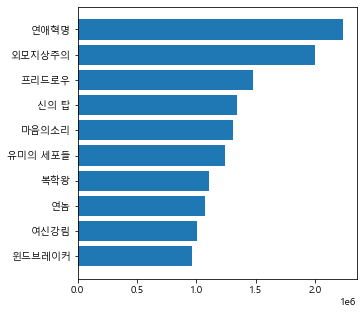

In [11]:

fig, ax = plt.subplots(figsize=(5,5))

plt.ticklabel_format(style='sci', axis='y', scilimits=(3,4))

ax.barh(list(df.title), list(df.likeIt))

# 주 2회 연재 만화 보기

In [12]:
pipeline=    [
    {
        '$match': {
            '$expr': {
                '$gt': [
                    {
                        '$size': '$dayrank'
                    }, 1
                ]
            }
        }
    }
]


In [13]:
plist=list(webtoons.aggregate(pipeline))

OperationFailure: Unrecognized pipeline stage name: '$expr'